In [0]:
from sklearn.metrics import classification_report,confusion_matrix

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [0]:
df =pd.read_csv("/content/drive/My Drive/PD, LGD,EAD Datasets/Dataset Attachment A.csv")

In [0]:
#EDA

In [8]:
df.head()

,query_id,url_id,query_length,is_homepage,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance
0,4631,28624,2,1,0.09,0.15,1288,352,376,13,0.46,0.35,0
1,4631,28625,2,1,0.20,0.35,4662,337,666,28,0.43,0.27,1
2,4631,28626,2,1,0.36,0.49,1121,385,270,15,0.34,0.20,1
3,4631,28627,2,1,0.21,0.45,2925,478,640,14,0.44,0.33,1
4,4631,28628,2,1,0.25,0.42,1328,429,412,27,0.40,0.57,1


In [9]:
df.tail()

,query_id,url_id,query_length,is_homepage,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance
80041,17038,102812,1,0,0.13,0.29,10,7,10,0,0.25,0.79,0
80042,17038,102813,1,0,0.12,0.20,121,0,46,1,0.30,0.50,0
80043,17038,102814,1,0,0.04,0.37,179,15,92,0,0.32,0.42,0
80044,17038,102815,1,0,0.22,0.50,643,223,114,10,0.32,0.86,1
80045,17038,102816,1,0,0.38,0.37,937,145,130,15,0.47,0.89,1


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80046 entries, 0 to 80045
Data columns (total 13 columns):
query_id        80046 non-null int64
url_id          80046 non-null int64
query_length    80046 non-null int64
is_homepage     80046 non-null int64
sig1            80046 non-null float64
sig2            80046 non-null float64
sig3            80046 non-null int64
sig4            80046 non-null int64
sig5            80046 non-null int64
sig6            80046 non-null int64
sig7            80046 non-null float64
sig8            80046 non-null float64
relevance       80046 non-null int64
dtypes: float64(4), int64(9)
memory usage: 7.9 MB


In [11]:
df.describe()

,query_id,url_id,query_length,is_homepage,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance
count,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000,80046.000000
mean,10862.069672,64219.328074,2.585826,0.268945,0.183240,0.346947,4857.078555,742.316256,550.527597,14.099155,0.319464,0.471846,0.437086
std,3586.767728,22522.930075,1.522094,0.443414,0.147354,0.172545,23531.973200,4818.359126,1887.933968,90.068426,0.138651,0.231306,0.496029
min,4631.000000,30.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7756.000000,45386.250000,2.000000,0.000000,0.080000,0.210000,78.000000,24.000000,10.000000,0.000000,0.220000,0.290000,0.000000
50%,10876.000000,64325.500000,2.000000,0.000000,0.150000,0.340000,417.000000,220.000000,64.000000,0.000000,0.310000,0.460000,0.000000
75%,13950.000000,83446.000000,3.000000,1.000000,0.240000,0.480000,2537.750000,591.000000,336.000000,2.000000,0.420000,0.640000,1.000000
max,17038.000000,102816.000000,18.000000,1.000000,1.000000,0.860000,673637.000000,660939.000000,46994.000000,3645.000000,0.880000,0.940000,1.000000


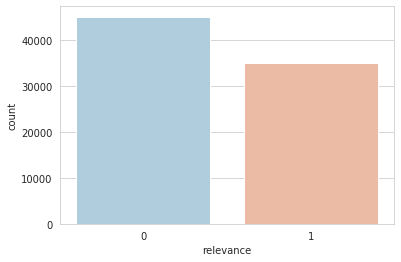

In [12]:
sns.set_style('whitegrid')
sns.countplot(x='relevance',data=df,palette='RdBu_r')

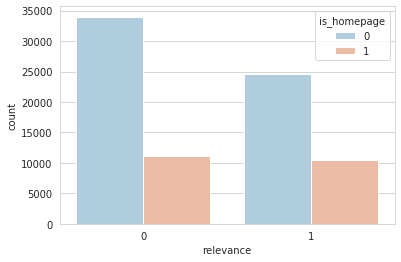

In [13]:
sns.set_style('whitegrid')
sns.countplot(x='relevance',hue='is_homepage',data= df,palette='RdBu_r')

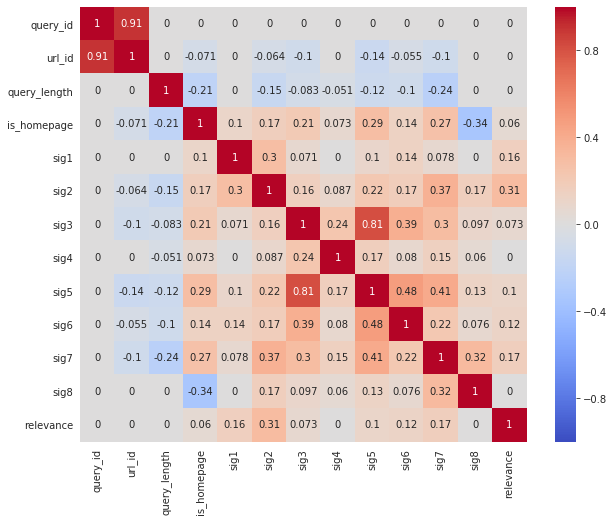

In [14]:
df_corr = df.corr()
df_corr[np.abs(df_corr)<.05] = 0
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

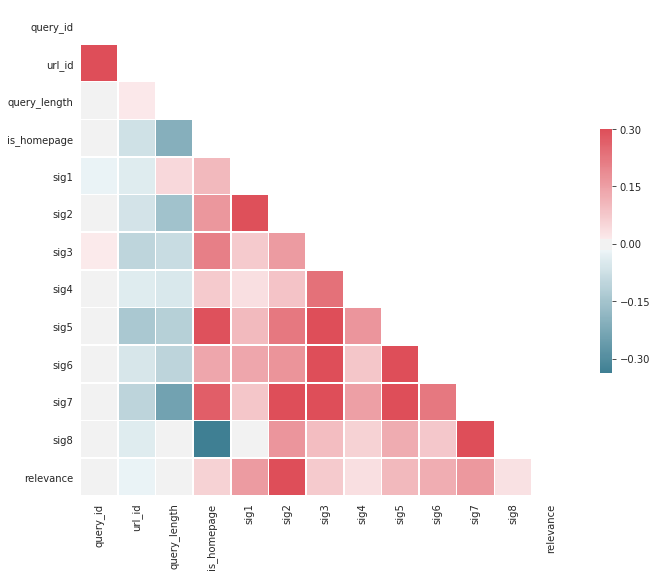

In [15]:
d =df
corr = d.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

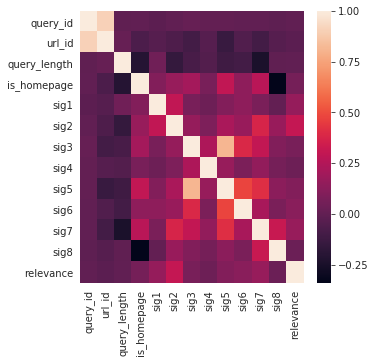

In [16]:
plt.figure(figsize=(5,5))
sns.heatmap(df.corr());

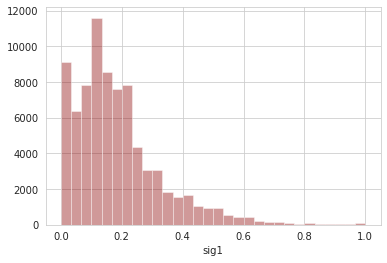

In [17]:
sns.distplot(df["sig1"].dropna(),kde=False,color='darkred',bins=30)

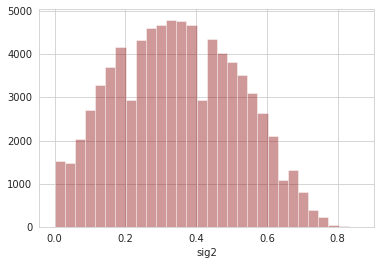

In [18]:
sns.distplot(df["sig2"].dropna(),kde=False,color='darkred',bins=30)

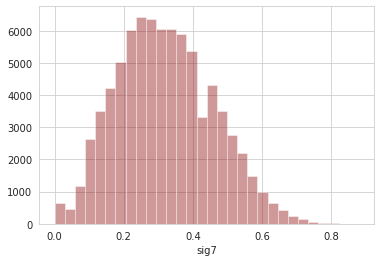

In [19]:
sns.distplot(df["sig7"].dropna(),kde=False,color='darkred',bins=30)

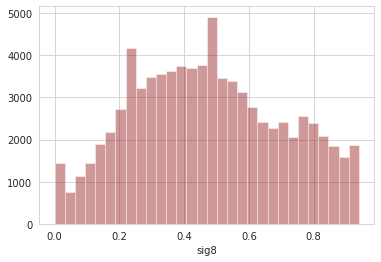

In [20]:
sns.distplot(df["sig8"].dropna(),kde=False,color='darkred',bins=30)

<Figure size 1800x576 with 0 Axes>

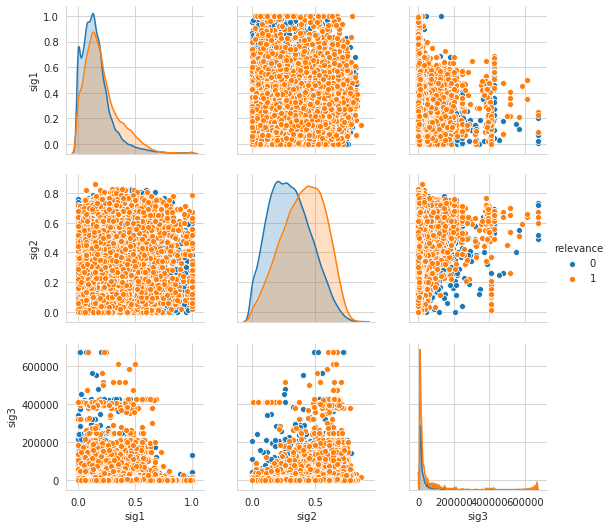

In [21]:
plt.figure(figsize=(25,8))

sns.pairplot(df, hue="relevance", vars = ["sig1","sig2","sig3"])

<Figure size 1800x576 with 0 Axes>

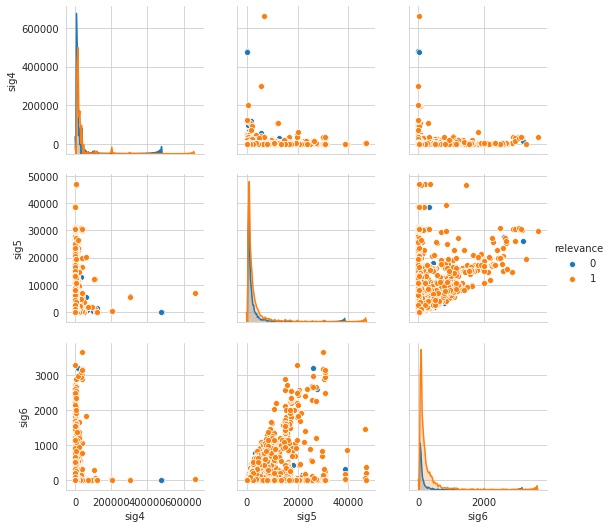

In [22]:
plt.figure(figsize=(25,8))

sns.pairplot(df, hue="relevance", vars = ["sig4","sig5","sig6"])

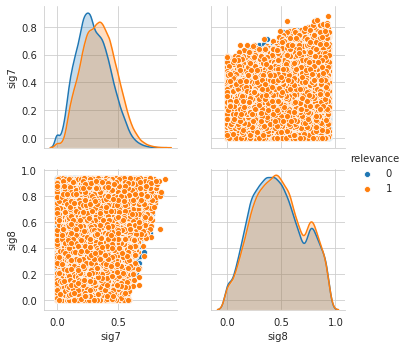

In [23]:


sns.pairplot(df, hue="relevance", vars = ["sig7","sig8"])

In [0]:
# Transforming the data

In [0]:
cat_feats = ["is_homepage"]

In [0]:
final_data = pd.get_dummies(df,columns=cat_feats,drop_first=True)

In [27]:
final_data.head()

,query_id,url_id,query_length,sig1,sig2,sig3,sig4,sig5,sig6,sig7,sig8,relevance,is_homepage_1
0,4631,28624,2,0.09,0.15,1288,352,376,13,0.46,0.35,0,1
1,4631,28625,2,0.20,0.35,4662,337,666,28,0.43,0.27,1,1
2,4631,28626,2,0.36,0.49,1121,385,270,15,0.34,0.20,1,1
3,4631,28627,2,0.21,0.45,2925,478,640,14,0.44,0.33,1,1
4,4631,28628,2,0.25,0.42,1328,429,412,27,0.40,0.57,1,1


In [0]:
final_data.set_index(["query_id","url_id"], inplace = True)

In [29]:
final_data.head()

query_length  sig1  sig2  ...  sig8  relevance  is_homepage_1
query_id url_id                            ...                                
4631     28624              2  0.09  0.15  ...  0.35          0              1
         28625              2  0.20  0.35  ...  0.27          1              1
         28626              2  0.36  0.49  ...  0.20          1              1
         28627              2  0.21  0.45  ...  0.33          1              1
         28628              2  0.25  0.42  ...  0.57          1              1

[5 rows x 11 columns]

In [0]:
final_data["query_length"] =(final_data["query_length"] -final_data["query_length"].min())/(final_data["query_length"].max()-final_data["query_length"].min())
final_data["sig1"] =(final_data["sig1"] -final_data["sig1"].min())/(final_data["sig1"].max()-final_data["sig1"].min())
final_data["sig2"] =(final_data["sig2"] -final_data["sig2"].min())/(final_data["sig2"].max()-final_data["sig2"].min())
final_data["sig3"] =(final_data["sig3"] -final_data["sig3"].min())/(final_data["sig3"].max()-final_data["sig3"].min())
final_data["sig4"] =(final_data["sig4"] -final_data["sig4"].min())/(final_data["sig4"].max()-final_data["sig4"].min())
final_data["sig5"] =(final_data["sig5"] -final_data["sig5"].min())/(final_data["sig5"].max()-final_data["sig5"].min())
final_data["sig6"] =(final_data["sig6"] -final_data["sig6"].min())/(final_data["sig6"].max()-final_data["sig6"].min())
final_data["sig7"] =(final_data["sig7"] -final_data["sig7"].min())/(final_data["sig7"].max()-final_data["sig7"].min())
final_data["sig8"] =(final_data["sig8"] -final_data["sig8"].min())/(final_data["sig8"].max()-final_data["sig8"].min())


In [31]:
final_data

query_length  sig1  ...  relevance  is_homepage_1
query_id url_id                      ...                          
4631     28624       0.058824  0.09  ...          0              1
         28625       0.058824  0.20  ...          1              1
         28626       0.058824  0.36  ...          1              1
         28627       0.058824  0.21  ...          1              1
         28628       0.058824  0.25  ...          1              1
...                       ...   ...  ...        ...            ...
17038    102812      0.000000  0.13  ...          0              0
         102813      0.000000  0.12  ...          0              0
         102814      0.000000  0.04  ...          0              0
         102815      0.000000  0.22  ...          1              0
         102816      0.000000  0.38  ...          1              0

[80046 rows x 11 columns]

In [0]:
# Variable Selection

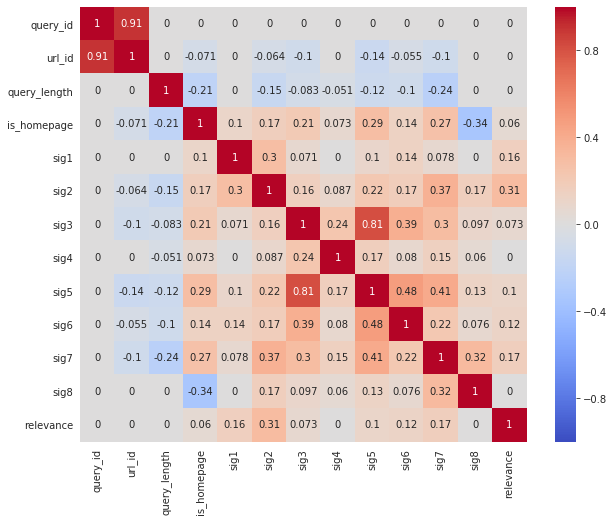

In [33]:
df_corr = df.corr()
df_corr[np.abs(df_corr)<.05] = 0
plt.figure(figsize=(10,8))
sns.heatmap(df_corr,
            vmin=-1,
            vmax=1,
            cmap='coolwarm',
            annot=True);

In [0]:
# Variable Importance

In [36]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X_train,y_train)
columns = X_train.columns
coefficients = model.feature_importances_.reshape(X_train.columns.shape[0], 1)
absCoefficients = abs(coefficients)
fullList = pd.concat((pd.DataFrame(columns, columns = ['Variable']), pd.DataFrame(absCoefficients, columns = ['absCoefficient'])), axis = 1).sort_values(by='absCoefficient', ascending = False)
print('RandomForestClassifier - Feature Importance:')
print('\n',fullList,'\n')

NameError: ignored

In [0]:
# Model Fitting

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X = final_data.drop('relevance',axis=1)
y = final_data['relevance']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [0]:
# logistic Regression

In [0]:
from sklearn.linear_model import LogisticRegression

In [41]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
predictions = logmodel.predict(X_test)

In [0]:
from sklearn.metrics import classification_report

In [44]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.66      0.78      0.71     13463
           1       0.63      0.48      0.55     10551

    accuracy                           0.65     24014
   macro avg       0.64      0.63      0.63     24014
weighted avg       0.64      0.65      0.64     24014



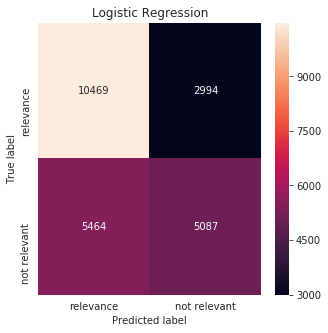

In [45]:
cm = confusion_matrix(y_test, predictions) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['relevance','not relevant'], 
                     columns = ['relevance','not relevant'])

plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, fmt ="g")
plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [46]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions)


0.6298735555888729

In [0]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

In [48]:
model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X, y)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

Num Features: 3
Selected Features: [ True False  True False False False  True False False False]
Feature Ranking: [1 2 1 4 8 6 1 3 5 7]


In [0]:
X1 = X[["query_length",'sig2','sig6']]

In [0]:
X1_train, X1_test, y_train, y_test = train_test_split(X1, y, test_size=0.30, random_state=101)

In [51]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel.fit(X1_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [52]:
predictions_reduced_features = logmodel.predict(X1_test)
print(classification_report(y_test,predictions_reduced_features))

              precision    recall  f1-score   support

           0       0.66      0.77      0.71     13463
           1       0.62      0.49      0.55     10551

    accuracy                           0.64     24014
   macro avg       0.64      0.63      0.63     24014
weighted avg       0.64      0.64      0.64     24014



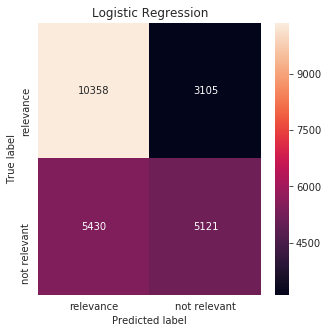

In [53]:
cm = confusion_matrix(y_test, predictions_reduced_features) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['relevance','not relevant'], 
                     columns = ['relevance','not relevant'])

plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, fmt ="g")
plt.title('Logistic Regression')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [54]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions_reduced_features)

0.6273623677070599

In [0]:
# Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier

In [0]:
dtree = DecisionTreeClassifier()

In [58]:
dtree.fit(X_train,y_train)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [0]:
predictions_decison_tree = dtree.predict(X_test)

In [60]:
print(classification_report(y_test,predictions_decison_tree))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62     13463
           1       0.52      0.52      0.52     10551

    accuracy                           0.58     24014
   macro avg       0.57      0.57      0.57     24014
weighted avg       0.58      0.58      0.58     24014



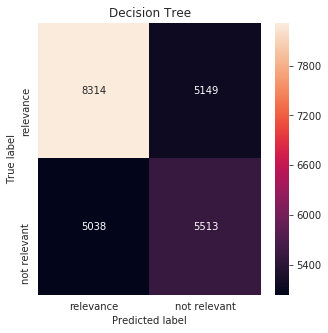

In [61]:
cm = confusion_matrix(y_test, predictions_decison_tree) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['relevance','not relevant'], 
                     columns = ['relevance','not relevant'])

plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, fmt ="g")
plt.title('Decision Tree')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [62]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, predictions_decison_tree)

0.5700270478073861

In [0]:
# Random Forest

In [64]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=600)
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
predictions_random_forest = rfc.predict(X_test)

In [66]:
print(classification_report(y_test,predictions_random_forest))

              precision    recall  f1-score   support

           0       0.66      0.78      0.72     13463
           1       0.64      0.50      0.56     10551

    accuracy                           0.65     24014
   macro avg       0.65      0.64      0.64     24014
weighted avg       0.65      0.65      0.65     24014



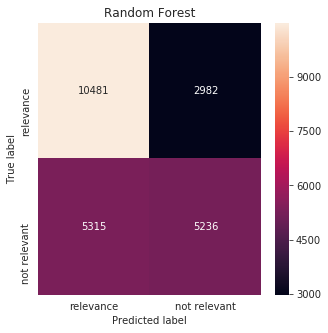

In [67]:
cm = confusion_matrix(y_test, predictions_random_forest) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['relevance','not relevant'], 
                     columns = ['relevance','not relevant'])

plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, fmt ="g")
plt.title('Random Forest')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [68]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,predictions_random_forest )

0.637380163578801

In [0]:
# KNN

In [70]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=1, p=2,
                     weights='uniform')

In [0]:
pred = knn.predict(X_test)

In [72]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.62      0.62      0.62     13463
           1       0.51      0.51      0.51     10551

    accuracy                           0.57     24014
   macro avg       0.56      0.56      0.56     24014
weighted avg       0.57      0.57      0.57     24014



In [0]:
error_rate = []

# Will take some time
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred_i = knn.predict(X_test)
    error_rate.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Error Rate')

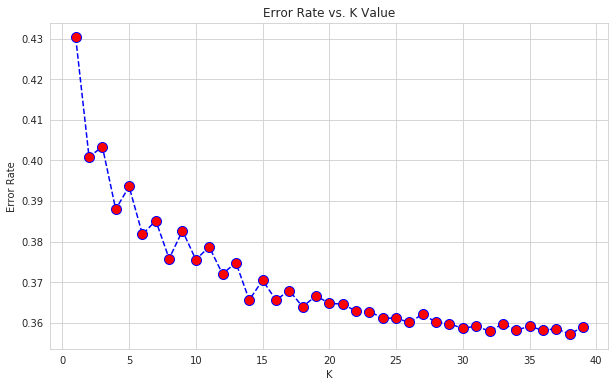

In [74]:
plt.figure(figsize=(10,6))
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [75]:
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=1')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=1


[[8328 5135]
 [5198 5353]]


              precision    recall  f1-score   support

           0       0.62      0.62      0.62     13463
           1       0.51      0.51      0.51     10551

    accuracy                           0.57     24014
   macro avg       0.56      0.56      0.56     24014
weighted avg       0.57      0.57      0.57     24014



In [91]:
# NOW WITH K=25
knn = KNeighborsClassifier(n_neighbors=25)

knn.fit(X_train,y_train)
pred = knn.predict(X_test)

print('WITH K=25')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=25


[[10139  3324]
 [ 5347  5204]]


              precision    recall  f1-score   support

           0       0.65      0.75      0.70     13463
           1       0.61      0.49      0.55     10551

    accuracy                           0.64     24014
   macro avg       0.63      0.62      0.62     24014
weighted avg       0.64      0.64      0.63     24014



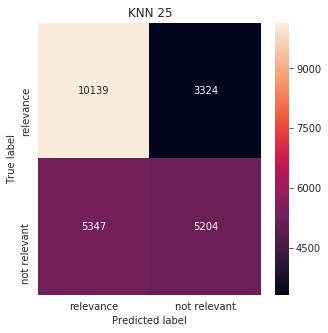

In [77]:
cm = confusion_matrix(y_test, pred) 

# Transform to df for easier plotting
cm_df = pd.DataFrame(cm,
                     index = ['relevance','not relevant'], 
                     columns = ['relevance','not relevant'])

plt.figure(figsize=(5,5))
sns.heatmap(cm_df, annot=True, fmt ="g")
plt.title('KNN 25')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [78]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test, pred)

0.6231622415146058